In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH

from gptchem.plotsettings import *

%matplotlib inline

## Load results

In [20]:
all_out = glob("out/**/*.pkl")

In [21]:
all_out = [load_pickle(p) for p in all_out]

In [22]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out:
    try:
        res = {
            "train_size": out["train_size"],
            "frac_valid": out["frac_valid"],
            "accuracy": out["accuracy"],
            "f1_macro": out["f1_macro"],
            "f1_micro": out["f1_micro"],
            "kappa": out["kappa"],
            "num_classes": out["num_classes"],
            "representation": out["representation"],
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        "train_size": out["train_size"],
        "accuracy": out["xgboost_baseline"]["accuracy"],
        "f1_macro": out["xgboost_baseline"]["f1_macro"],
        "f1_micro": out["xgboost_baseline"]["f1_micro"],
        "kappa": out["xgboost_baseline"]["kappa"],
        "num_classes": out["num_classes"],
    }

    tabpfn_res = {
        "train_size": out["train_size"],
        "accuracy": out["tabpfn_baseline"]["accuracy"],
        "f1_macro": out["tabpfn_baseline"]["f1_macro"],
        "f1_micro": out["tabpfn_baseline"]["f1_micro"],
        "kappa": out["tabpfn_baseline"]["kappa"],
        "num_classes": out["num_classes"],
    }

    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [23]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [24]:
grouped_res = res.groupby(["num_classes", "representation", "train_size"]).agg(
    ["mean", "std", sem, "count"]
)

In [25]:
grouped_xgboost_res = xgboost_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [27]:
grouped_tabpfn_res = tabpfn_res.groupby(["num_classes", "train_size"]).agg(["mean", "std", sem])

In [28]:
grouped_res.loc[2, :]

frac_valid                            accuracy  \
                                mean       std       sem count      mean   
representation train_size                                                  
inchi          10           1.000000  0.000000  0.000000     6  0.506000   
               50           1.000000  0.000000  0.000000     6  0.577333   
               100          1.000000  0.000000  0.000000     6  0.570000   
               200          1.000000  0.000000  0.000000     2  0.616000   
               500          1.000000  0.000000  0.000000     3  0.644000   
iupac_name     10           1.000000  0.000000  0.000000     6  0.502667   
               50           1.000000  0.000000  0.000000     6  0.557333   
               100          1.000000  0.000000  0.000000     5  0.550400   
               200          1.000000  0.000000  0.000000     2  0.614000   
               500          1.000000  0.000000  0.000000     3  0.676000   
selfies        10           0.996667  0.004676  0.001909     6  0.524461   
               50           1.000000  0.000000  0.000000     6  0.552000   
               100          1.000000  0.000000  0.000000     5  0.556000   
               200          1.000000  0.000000  0.000000     2  0.594000   
               500          1.000000  0.000000  0.000000     3  0.648000   
smiles         10           1.000000  0.000000  0.000000     7  0.510857   
               50           1.000000  0.000000  0.000000     6  0.569333   
               100          1.000000  0.000000  0.000000     6  0.597333   
               200          1.000000  0.000000  0.000000     3  0.617333   
               500          1.000000  0.000000  0.000000     3  0.678667   

                                                     f1_macro            \
                                std       sem count      mean       std   
representation train_size                                                 
inchi          10          0.068106  0.027804     6  0.498597  0.071371   
               50          0.023956  0.009780     6  0.575866  0.023205   
               100         0.034012  0.013885     6  0.564257  0.032176   
               200         0.045255  0.032000     2  0.608373  0.044268   
               500         0.022271  0.012858     3  0.643194  0.022063   
iupac_name     10          0.037580  0.015342     6  0.441076  0.073295   
               50          0.027674  0.011298     6  0.554577  0.029686   
               100         0.030672  0.013717     5  0.549739  0.030767   
               200         0.014142  0.010000     2  0.612223  0.011709   
               500         0.030199  0.017436     3  0.675774  0.029943   
selfies        10          0.042763  0.017458     6  0.477123  0.061329   
               50          0.016589  0.006772     6  0.545933  0.023938   
               100         0.061188  0.027364     5  0.544762  0.071155   
               200         0.031113  0.022000     2  0.593722  0.031505   
               500         0.010583  0.006110     3  0.646837  0.009708   
smiles         10          0.048974  0.018511     7  0.497102  0.045562   
               50          0.051702  0.021107     6  0.565489  0.053350   
               100         0.041621  0.016992     6  0.595960  0.041784   
               200         0.052205  0.030140     3  0.615638  0.052925   
               500         0.036295  0.020955     3  0.677772  0.037246   

                                           f1_micro                            \
                                sem count      mean       std       sem count   
representation train_size                                                       
inchi          10          0.029137     6  0.506000  0.068106  0.027804     6   
               50          0.009473     6  0.577333  0.023956  0.009780     6   
               100         0.013136     6  0.570000  0.034012  0.013885     6   
               200         0.031302     2  0.616000  0.045255  0.

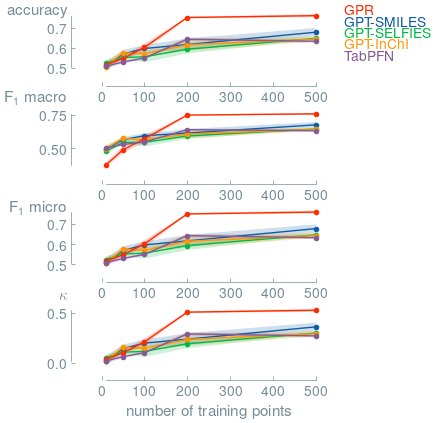

In [33]:

fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[2, "smiles", :].index,
        grouped_res.loc[2, "smiles", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "smiles", :].index,
        grouped_res.loc[2, "smiles", :][metric]["mean"]
        - grouped_res.loc[2, "smiles", :][metric]["sem"],
        grouped_res.loc[2, "smiles", :][metric]["mean"]
        + grouped_res.loc[2, "smiles", :][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
         grouped_res.loc[2, "smiles", :].index,
         np.stack(
            [ grouped_res.loc[2, "smiles", :][metric]["mean"], grouped_res.loc[2, "selfies", :][metric]["mean"],  grouped_res.loc[2, "inchi", :][metric]["mean"], grouped_xgboost_res.loc[2, :][metric]["mean"], grouped_tabpfn_res.loc[2, :][metric]["mean"]]
         ).flatten()
    )

    ax[i].plot(
        grouped_res.loc[2, "selfies", :].index,
        grouped_res.loc[2, "selfies", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "selfies", :].index,
        grouped_res.loc[2, "selfies", :][metric]["mean"]
        - grouped_res.loc[2, "selfies", :][metric]["sem"],
        grouped_res.loc[2, "selfies", :][metric]["mean"]
        + grouped_res.loc[2, "selfies", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, "inchi", :].index,
        grouped_res.loc[2, "inchi", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[2, "inchi", :].index,
        grouped_res.loc[2, "inchi", :][metric]["mean"]
        - grouped_res.loc[2, "inchi", :][metric]["sem"],
        grouped_res.loc[2, "inchi", :][metric]["mean"]
        + grouped_res.loc[2, "inchi", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        - grouped_xgboost_res.loc[2, :][metric]["sem"],
        grouped_xgboost_res.loc[2, :][metric]["mean"]
        + grouped_xgboost_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :][metric]["mean"]
        - grouped_tabpfn_res.loc[2, :][metric]["sem"],
        grouped_tabpfn_res.loc[2, :][metric]["mean"]
        + grouped_tabpfn_res.loc[2, :][metric]["sem"],
        alpha=0.2,
    )


ylabel_top("accuracy", ax=ax[0], x_pad=0.05, y_pad=0.06)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], x_pad=0.05, y_pad=0.06)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], x_pad=0.05, y_pad=0.06)
ylabel_top(r"$\kappa$", ax=ax[3], x_pad=0.05, y_pad=0.06)
ax[-1].set_xlabel("number of training points", labelpad=4)
matplotx.line_labels(ax=ax[0])
plt.subplots_adjust(hspace=.6, top=1, bottom=.2)

fig.savefig("lipophilicity-classification_results_binary.pdf", bbox_inches="tight")

In [34]:
find_learning_curve_intersection(
    grouped_res.loc[2, "inchi", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

4.885125790159546

In [35]:
find_learning_curve_intersection(
    grouped_res.loc[2, "inchi", :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

0.9685831107527777

In [36]:
intersections = []

for i, val in enumerate(grouped_res.loc[2, "inchi", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[2, "inchi", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, :].index,
        grouped_xgboost_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections.append(factor)


intersections_tabpfn = []

for i, val in enumerate(grouped_res.loc[2, "inchi", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[2, "inchi", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections_tabpfn.append(factor)


In [37]:
from gptchem.evaluator import get_kappa_intersections, add_kappa_vlines

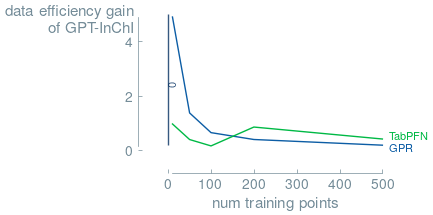

In [51]:
fig, ax = plt.subplots(1,1,  figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_res.loc[2, "inchi", :].index, intersections, label='GPR')
ax.plot(grouped_res.loc[2, "inchi", :].index, intersections_tabpfn, label='TabPFN')
matplotx.line_labels(fontsize=8)
add_kappa_vlines(
        grouped_res.loc[2, "inchi", :]["kappa"].index, 
        grouped_res.loc[2, "inchi", :]["kappa"]["mean"],
        low=-5,
        ymax=5
)
ylabel_top('data efficiency gain\n  of GPT-InChI', x_pad = 0.045, y_pad=-0.3)
ax.set_xlabel('num training points', labelpad=4)
range_frame(
    ax,
    grouped_res.loc[2, "inchi", :]["kappa"].index, 
    np.stack(
        [intersections, intersections_tabpfn]
    ).flatten()
)
plt.savefig('lipophilicity-binary-data-efficiency.pdf', bbox_inches='tight')

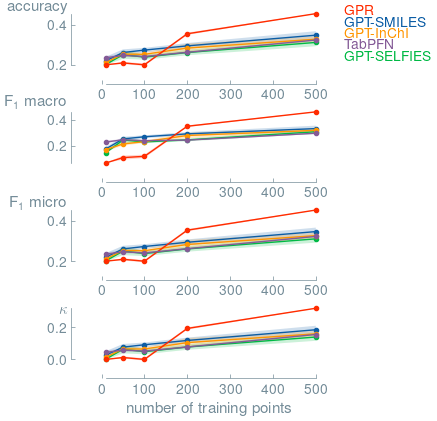

In [55]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[5, "smiles", :].index,
        grouped_res.loc[5, "smiles", :][metric]["mean"],
        marker="o",
        label="GPT-SMILES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "smiles", :].index,
        grouped_res.loc[5, "smiles", :][metric]["mean"]
        - grouped_res.loc[5, "smiles", :][metric]["sem"],
        grouped_res.loc[5, "smiles", :][metric]["mean"]
        + grouped_res.loc[5, "smiles", :][metric]["sem"],
        alpha=0.2,
    )
    
    range_frame(
        ax[i],
         grouped_res.loc[5, "smiles", :].index,
         np.stack(
            [ grouped_res.loc[5, "smiles", :][metric]["mean"], grouped_res.loc[5, "selfies", :][metric]["mean"],  grouped_res.loc[5, "inchi", :][metric]["mean"], grouped_xgboost_res.loc[5, :][metric]["mean"], grouped_tabpfn_res.loc[5, :][metric]["mean"]]
         ).flatten()
    )

    ax[i].plot(
        grouped_res.loc[5, "selfies", :].index,
        grouped_res.loc[5, "selfies", :][metric]["mean"],
        marker="o",
        label="GPT-SELFIES",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "selfies", :].index,
        grouped_res.loc[5, "selfies", :][metric]["mean"]
        - grouped_res.loc[5, "selfies", :][metric]["sem"],
        grouped_res.loc[5, "selfies", :][metric]["mean"]
        + grouped_res.loc[5, "selfies", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, "inchi", :].index,
        grouped_res.loc[5, "inchi", :][metric]["mean"],
        marker="o",
        label="GPT-InChI",
    )
    ax[i].fill_between(
        grouped_res.loc[5, "inchi", :].index,
        grouped_res.loc[5, "inchi", :][metric]["mean"]
        - grouped_res.loc[5, "inchi", :][metric]["sem"],
        grouped_res.loc[5, "inchi", :][metric]["mean"]
        + grouped_res.loc[5, "inchi", :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"],
        marker="o",
        label="GPR",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        - grouped_xgboost_res.loc[5, :][metric]["sem"],
        grouped_xgboost_res.loc[5, :][metric]["mean"]
        + grouped_xgboost_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :][metric]["mean"]
        - grouped_tabpfn_res.loc[5, :][metric]["sem"],
        grouped_tabpfn_res.loc[5, :][metric]["mean"]
        + grouped_tabpfn_res.loc[5, :][metric]["sem"],
        alpha=0.2,
    )

ylabel_top("accuracy", ax=ax[0], x_pad=0.05, y_pad=0.06)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], x_pad=0.05, y_pad=0.06)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], x_pad=0.05, y_pad=0.06)
ylabel_top(r"$\kappa$", ax=ax[3], x_pad=0.05, y_pad=0.06)
ax[-1].set_xlabel("number of training points", labelpad=4)
matplotx.line_labels(ax=ax[0])
plt.subplots_adjust(hspace=.6, top=1, bottom=.2)

fig.savefig("lipophilicity-classification_results_5_class.pdf", bbox_inches="tight")

In [56]:
intersections = []

for i, val in enumerate(grouped_res.loc[5, "inchi", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[5, "inchi", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_xgboost_res.loc[5, :].index,
        grouped_xgboost_res.loc[5, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections.append(factor)


intersections_tabpfn = []

for i, val in enumerate(grouped_res.loc[5, "inchi", :].index):
    factor= find_learning_curve_intersection(
    grouped_res.loc[5, "inchi", :]["f1_macro"]["mean"].values[i],
    fit_learning_curve(
        grouped_tabpfn_res.loc[5, :].index,
        grouped_tabpfn_res.loc[5, :]["f1_macro"]["mean"],
    )[0],
) / val

    intersections_tabpfn.append(factor)


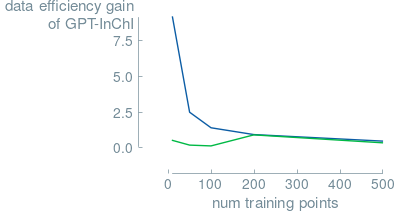

In [63]:
fig, ax = plt.subplots(1,1,  figsize=(ONE_COL_WIDTH_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH))
ax.plot(grouped_res.loc[5, "inchi", :].index, intersections, label='GPR')
ax.plot(grouped_res.loc[5, "inchi", :].index, intersections_tabpfn, label='TabPFN')

add_kappa_vlines(
        grouped_res.loc[5, "inchi", :]["kappa"].index, 
        grouped_res.loc[5, "inchi", :]["kappa"]["mean"],
        low=-5,
        ymax=5
)
ylabel_top('data efficiency gain\n  of GPT-InChI', x_pad = 0.045, y_pad=-0.15)
ax.set_xlabel('num training points', labelpad=4)
range_frame(
    ax,
    grouped_res.loc[5, "inchi", :]["kappa"].index, 
    np.stack(
        [intersections, intersections_tabpfn]
    ).flatten()
)
plt.savefig('lipophilicity-5-data-efficiency.pdf', bbox_inches='tight')